Period (day) : 0.3996
Primary star parameter
Primary Mass : 1.4
Primary Radius : 1.37
Primary Lumonosity : 2.58
Primary Temperature : 5696.6
Secondary star parameter
Secondary Mass : 0.41
Secondary Radius : 0.77
Secondary Lumonosity : 0.84
Secondary Temperature : 5702
Mass Ratio : 0.29
Eclipsing Binary type : Late-type Contact Binary


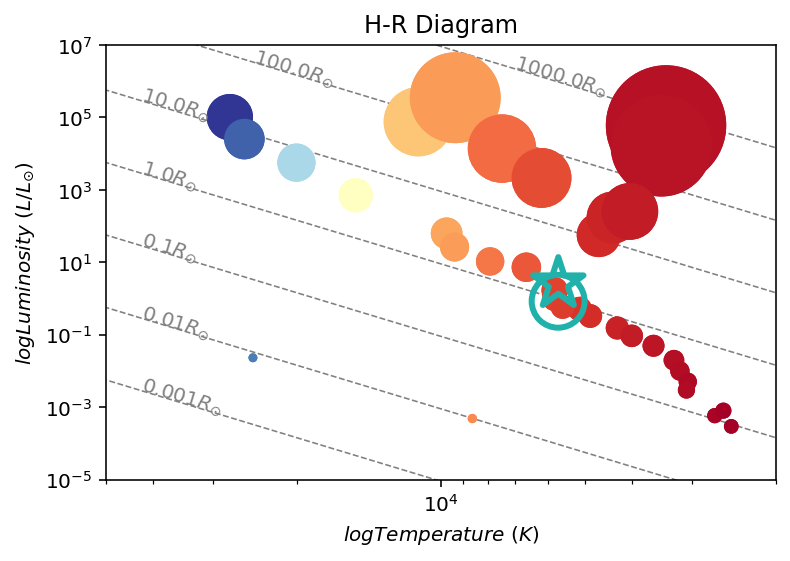

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import seaborn as sns
from sklearn.preprocessing import StandardScaler
%matplotlib notebook
import matplotlib.animation as animation
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter,AutoMinorLocator)
import math
%matplotlib inline
%config InlineBackend.figure_format='retina'

df =pd.read_csv("EBs Data.csv")


x = df[[ 'P', 'q', 'M1', 'M2', 'R1', 'R2', 'L1', 'L2', 'T1', 'T2']]
scaler = StandardScaler()
x = scaler.fit_transform(x)





model = KMeans(n_clusters=5,random_state=42)

model.fit(x)
model.cluster_centers_


model.fit(x)

y_means = model.fit_predict(x)

model.labels_

##Solar parameters
L_sun=3.83*10*26 ##J/s
R_sun=6.96*10**8 ##meter
T_sun=5780. ##Kelvin

rotated_labels = []
def text_slope_match_line(text, x, y, line):
    global rotated_labels

    # find the slope
    xdata, ydata = line.get_data()

    x1 = xdata[0]
    x2 = xdata[-1]
    y1 = ydata[0]
    y2 = ydata[-1]

    rotated_labels.append({"text":text, "line":line, "p1":np.array((x1, y1)), "p2":np.array((x2, y2))})

def update_text_slopes(ax):
    global rotated_labels

    for label in rotated_labels:
        # slope_degrees is in data coordinates, the text() and annotate() functions need it in screen coordinates
        text, line = label["text"], label["line"]
        p1, p2 = label["p1"], label["p2"]

        # get the line's data transform
        ax = ax

        sp1 = ax.transData.transform_point(p1)
        sp2 = ax.transData.transform_point(p2)

        rise = (sp2[1] - sp1[1])
        run = (sp2[0] - sp1[0])

        slope_degrees = math.degrees(math.atan(rise/run))

        text.set_rotation(slope_degrees)

def init():
    line.set_data([], [])
    return line,

def animate(i):
    line.set_data(xse[:i],yse[:i])
    return line


def HRD(SE, ADDSTAR, Temperature, Luminosity):
    ##Plot background HR Diagram
    cm = plt.cm.get_cmap('RdYlBu')
    ax.scatter(xhr, yhr, c=xhr, cmap=cm, s=zhr, zorder=2, alpha=1)
    
    ##Create animation object
    if SE=='yes':
        anim = animation.FuncAnimation(fig, animate, init_func=init, frames=len(xse), interval=150, blit=False)
        ax.scatter(15000, 0.005, marker='D', s=600, alpha=0.2)
        corry=-0.001; corrx=1000
        ax.annotate('WD', xy=(15000+corrx, 0.005+corry))
        return anim

    if ADDSTAR=='yes':
        thestar=ax.scatter(Temperature, Luminosity, color='lightseagreen',lw=3, s=700,\
                           marker='*', facecolor='none', zorder=3)
        return thestar

def init():
    line.set_data([], [])
    return line,

def animate(i):
    line.set_data(xse[:i],yse[:i])
    return line


def HRD2(SE, ADDSTAR, Temperature, Luminosity):
    ##Plot background HR Diagram
    cm = plt.cm.get_cmap('RdYlBu')
    ax.scatter(xhr, yhr, c=xhr, cmap=cm, s=zhr, zorder=2, alpha=1)
    
    ##Create animation object
    if SE=='yes':
        anim = animation.FuncAnimation(fig, animate, init_func=init, frames=len(xse), interval=150, blit=False)
        ax.scatter(15000, 0.005, marker='D', s=600, alpha=0.2)
        corry=-0.001; corrx=1000
        ax.annotate('WD', xy=(15000+corrx, 0.005+corry))
        return anim

    if ADDSTAR=='yes':
        thestar=ax.scatter(Temperature, Luminosity, color='lightseagreen',lw=3, s=700,\
                           marker='o', facecolor='none', zorder=3)
        return thestar

HRstars=np.genfromtxt('HRstars.csv',delimiter=',')
xhr=HRstars[:,0]; yhr=HRstars[:,1]
zhr=pow(np.array(yhr)/pow(np.array(xhr)/T_sun,4),0.25)
zhr=12*zhr/min(zhr)

SunEvoldata=np.genfromtxt('SunEvol.csv', delimiter=',')
xse=SunEvoldata[:,0]; yse=SunEvoldata[:,1]

MainStagedata=np.genfromtxt('MainStage.csv', delimiter=',')
xms=MainStagedata[:,0]; yms=MainStagedata[:,1]

##Generate L and T array for constant radii lines
R=np.array([0.001, 0.01, 0.1, 1., 10., 100., 1000.])
T=np.linspace(1000., 50000., num=50)


##Location for line annotation
xloc=np.array([48000, 48000, 48000, 48000, 48000, 28000, 8000])
yloc=(xloc/T_sun)**4*R**2

P = float(input('Period (day) : '))


print('Primary star parameter')
M1 = float(input('Primary Mass : '))
R1 = float(input('Primary Radius : '))
L1 = float(input('Primary Lumonosity : '))
T1 = float(input('Primary Temperature : '))

print('Secondary star parameter')
M2 = float(input('Secondary Mass : '))
R2 = float(input('Secondary Radius : '))
L2 = float(input('Secondary Lumonosity : '))
T2 = float(input('Secondary Temperature : '))

q = float(input('Mass Ratio : '))

scaler = StandardScaler()
allparameter =([[P,q,M1,M2,R1,R2,L1,L2,T1,T2]])
data = scaler.fit_transform(allparameter)


##First set up the figure, the axis, and the plot element we want to animate
fig=plt.figure()
ax=plt.gca()
line, = ax.plot([],[], '--', lw=2.5, color='k')
ax.set_xlim(2000,50000,1000)
ax.set_ylim(10**-5,10**7)
ax.invert_xaxis()
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel(r'$log Temperature\ (K)$')
ax.set_ylabel(r'$log Luminosity\ (L/L_{\odot})$')
ax.set_title('H-R Diagram')

##Plot the background of each frame
for i in range(len(R)):
    L=pow(T/T_sun, 4)*pow(R[i], 2)
    greyline, =ax.plot(T, L, '--', c='gray', lw=0.8, zorder=1)
    t = ax.annotate(str(R[i])+'$R_{\odot}$', xy=(xloc[i], yloc[i]), xytext=(12, 0),\
                    textcoords='offset points', horizontalalignment='left', verticalalignment='center_baseline',\
                    color='grey')
    text_slope_match_line(t, 40000, L[-1], greyline)
update_text_slopes(ax)
HRD('no', 'yes', T1 , L1)
HRD2('no', 'yes', T2 , L2)



predict = model.predict(data)
if predict ==0:
    print('Eclipsing Binary type : Contact Binary')
elif predict ==1:
    print('Eclipsing Binary type : Semi-Detached Binary')
elif predict ==2:
    print('Eclipsing Binary type : Early-type Contact Binary')
elif predict ==3:
    print('Eclipsing Binary type : Detached Binary')
elif predict ==4:
    print('Eclipsing Binary type : Late-type Contact Binary')
